IMPORT LIBRARY

In [96]:
import pandas
import matplotlib.pyplot
import seaborn
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

UP DATA

In [97]:
dataFrame = pandas.read_csv('lengkap.csv', usecols=['Kecamatan','Produksi','Nilai','Tahun'])
# dataFrame['tahun'] = pandas.to_datetime(dataFrame['tahun'], format='%Y')


CEK 5 DATA TERATAS UNTUK MEMERIKSA APAKAH DATA BERHASIL DI UP

In [98]:
dataFrame.head()

,Kecamatan,Produksi,Nilai,Tahun
0,Wonotunggal,892.7,1481888,2016
1,Bandar,1608.6,2548950,2016
2,Blado,924.2,1491888,2016
3,Reban,652.3,1062062,2016
4,Bawang,1529.4,2336538,2016


CEK INFORMASI DARI DATA

In [99]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kecamatan  75 non-null     object 
 1   Produksi   75 non-null     float64
 2   Nilai      75 non-null     int64  
 3   Tahun      75 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ KB


CEK MISSING VALUE

In [100]:
dataFrame.isnull().sum()

Kecamatan    0
Produksi     0
Nilai        0
Tahun        0
dtype: int64

CEK STATISTICAL DESCRIPTION DARI DATA

(JUMLAH DATA, RERATA, STANDARD DEVIASI, MIN, KUARTIL 1 2 3, MAKS)

In [101]:
dataFrame.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Produksi,Nilai,Tahun
count,75.00000,75.00000,75.00000
mean,921.04440,1519479.12000,2018.00000
std,504.60356,819612.54169,1.42374
min,41.00000,169930.00000,2016.00000
25%,464.61000,860751.00000,2017.00000
50%,959.90440,1554132.00000,2018.00000
75%,1341.48500,2197885.00000,2019.00000
max,1698.77040,2886863.00000,2020.00000


VISUALISASI DATA

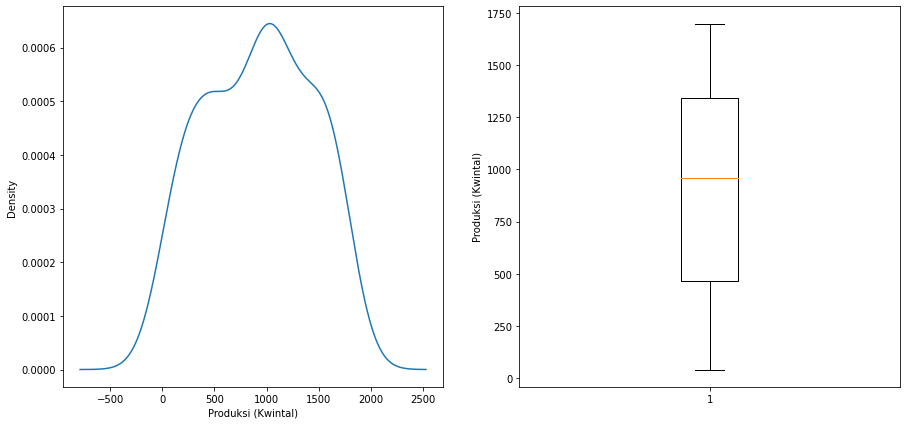

In [102]:
figure = matplotlib.pyplot.figure(figsize=(15,7))

figure.add_subplot(1,2,1)
dataFrame['Produksi'].plot(kind='kde')
matplotlib.pyplot.xlabel('Produksi (Kwintal)')

figure.add_subplot(1,2,2)
matplotlib.pyplot.boxplot(dataFrame['Produksi'])
matplotlib.pyplot.ylabel('Produksi (Kwintal)')
matplotlib.pyplot.show()

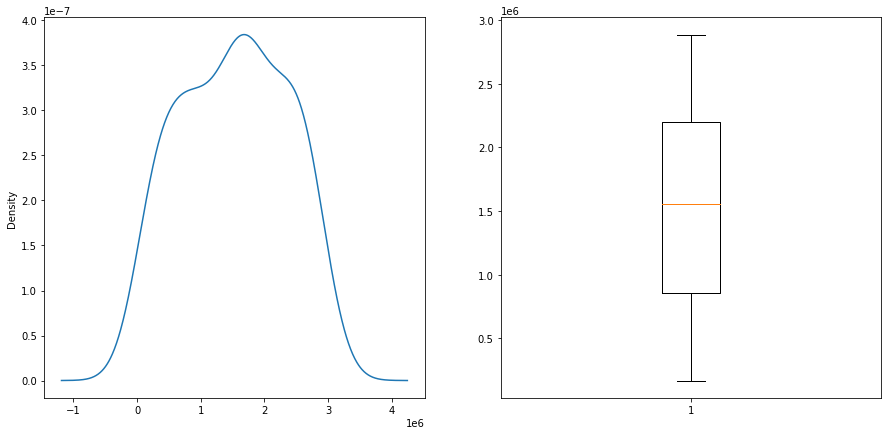

In [111]:
figure = matplotlib.pyplot.figure(figsize=(15,7))

figure.add_subplot(1,2,1)
df['Nilai'].plot(kind='kde')

figure.add_subplot(1,2,2)
matplotlib.pyplot.boxplot(df['Nilai'])
matplotlib.pyplot.show()

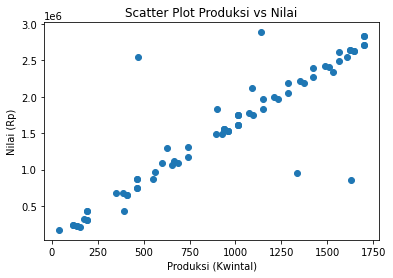

In [114]:
matplotlib.pyplot.scatter(dataFrame['Produksi'], dataFrame['Nilai'])
matplotlib.pyplot.xlabel('Produksi (Kwintal)')
matplotlib.pyplot.ylabel('Nilai (Rp)')
matplotlib.pyplot.title('Scatter Plot Produksi vs Nilai')
matplotlib.pyplot.show()

PENANGANAN OUTLIER

In [117]:
def is_outlier(input):
    sorted(input)
    Q1,Q3 = numpy.percentile(input , [25,75])
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    return ~input.between(lower_limit, upper_limit)

In [118]:
dataFrame = dataFrame[~dataFrame.groupby('Kecamatan')['Nilai'].apply(is_outlier)]
dataFrame = dataFrame[~dataFrame.groupby('Kecamatan')['Produksi'].apply(is_outlier)]

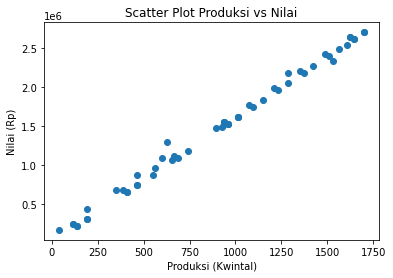

In [119]:
matplotlib.pyplot.scatter(dataFrame['Produksi'], dataFrame['Nilai'])
matplotlib.pyplot.xlabel('Produksi (Kwintal)')
matplotlib.pyplot.ylabel('Nilai (Rp)')
matplotlib.pyplot.title('Scatter Plot Produksi vs Nilai')
matplotlib.pyplot.show()

LINEAR REGRESSION

In [120]:
x=dataFrame['Produksi'].values.reshape(-1,1)
y=dataFrame['Nilai'].values.reshape(-1,1)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [122]:
linearRegression = LinearRegression()

In [123]:
linearRegression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
print(linearRegression.coef_)
print(linearRegression.intercept_)

[[1573.28489756]]
[46943.91277133]


In [125]:
linearRegression.score(x_test,y_test)

0.9776535276242179

Text(0.5, 1.0, 'Plot Produksi vs Nilai')

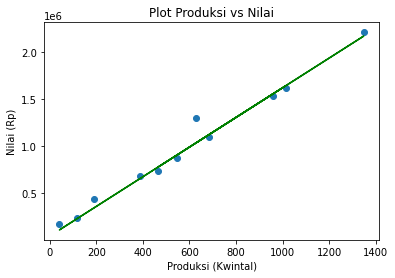

In [128]:
y_prediksi = linearRegression.predict(x_test)
matplotlib.pyplot.scatter(x_test, y_test)
matplotlib.pyplot.plot(x_test, y_prediksi, c = 'g')
matplotlib.pyplot.xlabel('Produksi (Kwintal)')
matplotlib.pyplot.ylabel('Nilai (Rp)')
matplotlib.pyplot.title('Plot Produksi vs Nilai')

In [127]:
linearRegression.predict([[500]])

array([[833586.36154951]])